In [1]:
import scanpy as sc
adata=sc.read("data/adata_tree.h5ad")

In [2]:
import scFates as scf

In [3]:
r="NCC2"
m=["ChC","nmSC<>mSC"]

In [4]:
scf.tl.subset_tree(adata,root_milestone=r,milestones=m)

subsetting tree
node 354 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    finished (0:00:03) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.
    finished (0:00:00) --> tree extracted
--> added 
    .obs['old_milestones'], previous milestones from intial tree


In [5]:
scf.tl.dendrogram(adata,crowdedness=.1)

Generating dendrogram of tree
    segment : 100%|██████████| 3/3 [00:00<00:00,  4.94it/s]
    finished (0:00:00) --> added 
    .obsm['X_dendro'], new embedding generated.
    .uns['dendro_segments'] tree segments used for plotting.


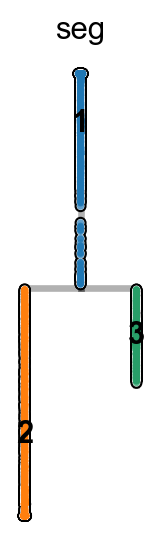

In [6]:
sc.set_figure_params(figsize=(1,4),frameon=False)
scf.pl.dendrogram(adata,color="seg",legend_loc="on data",tree_behind=True,add_outline=True,clip_on=False,show_info=False)

In [7]:
maxt=adata.obs.t[adata.obs.seg=="3"].max()

In [8]:
scf.tl.subset_tree(adata,mode="pseudotime",t_max=maxt)

subsetting tree
node 282 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    finished (0:00:02) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.
    finished (0:00:00) --> tree subsetted


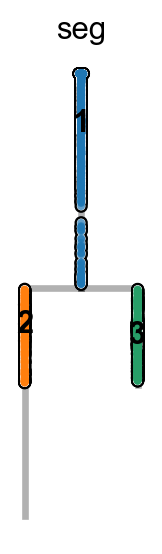

In [9]:
scf.pl.dendrogram(adata,color="seg",legend_loc="on data",tree_behind=True,add_outline=True,clip_on=False,show_info=False)

In [11]:
scf.tl.pseudotime(adata,n_jobs=40,n_map=100)

projecting cells onto the principal graph
    mappings: 100%|██████████| 100/100 [00:28<00:00,  3.56it/s]
    finished (0:00:28) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


In [12]:
scf.tl.dendrogram(adata,crowdedness=.1)

Generating dendrogram of tree
    segment : 100%|██████████| 3/3 [00:00<00:00,  5.91it/s]
    finished (0:00:00) --> added 
    .obsm['X_dendro'], new embedding generated.
    .uns['dendro_segments'] tree segments used for plotting.


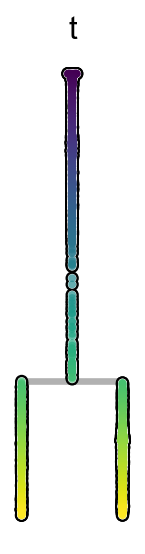

In [13]:
sc.set_figure_params(figsize=(1,4),frameon=False)
scf.pl.dendrogram(adata,color="t",tree_behind=True,add_outline=True,clip_on=False,show_info=False)

In [14]:
scf.tl.test_association(adata,n_jobs=40)

test features for association with the trajectory
    single mapping : 100%|██████████| 21676/21676 [02:16<00:00, 159.09it/s]
    found 4147 significant features (0:02:16) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.


In [15]:
scf.tl.fit(adata,n_jobs=40)

fit features associated with the trajectory
    single mapping : 100%|██████████| 4147/4147 [01:05<00:00, 63.45it/s]
    finished (adata subsetted to keep only fitted features!) (0:01:10) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


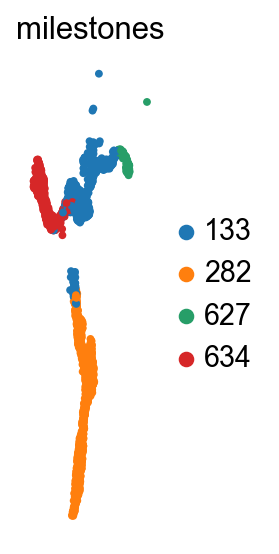

In [18]:
sc.pl.umap(adata,color="milestones")
scf.tl.rename_milestones(adata,["bifurcation","NCC2","SA","imSC"])

In [19]:
r="NCC2"
m=["SA","imSC"]

In [20]:
scf.tl.test_fork(adata,r,m,n_jobs=40)

testing fork
    single mapping


/home/lfaure/scFates/scFates/tools/bifurcation_tools.py:153: FutureWarning: In a future version of pandas all arguments of Index.drop_duplicates will be keyword-only
  brcells = brcells.loc[brcells.index.drop_duplicates(False)]


    Differential expression: 100%|██████████| 4147/4147 [00:25<00:00, 161.29it/s]
    test for upregulation for each leave vs root
    upreg imSC: 100%|██████████| 970/970 [00:01<00:00, 531.23it/s]
    finished (0:00:34) --> added 
    .uns['NCC2->SA<>imSC']['fork'], DataFrame with fork test results.


In [21]:
scf.tl.branch_specific(adata,r,m,effect=.8)

    branch specific features: SA: 221, imSC: 221
    finished --> updated 
    .uns['NCC2->SA<>imSC']['fork'], DataFrame updated with additionnal 'branch' column.


In [67]:
#scf.tl.activation(adata,r,m,n_jobs=20,nwin=10,deriv_cut=.3,pseudotime_offset=0.005)
scf.tl.activation(adata,r,m,n_jobs=20,nwin=10,deriv_cut=.2,pseudotime_offset=0.006)

testing activation
    to imSC: 100%|██████████| 221/221 [00:04<00:00, 47.89it/s]
    threshold pseudotime is: 0.046985227093229436
    90 early and 131 late features specific to leave SA
    170 early and 51 late features specific to leave imSC
    finished (0:00:07) --> updated 
    .uns['NCC2->SA<>imSC']['fork'], DataFrame updated with additionnal 'activation' and 'module' columns.


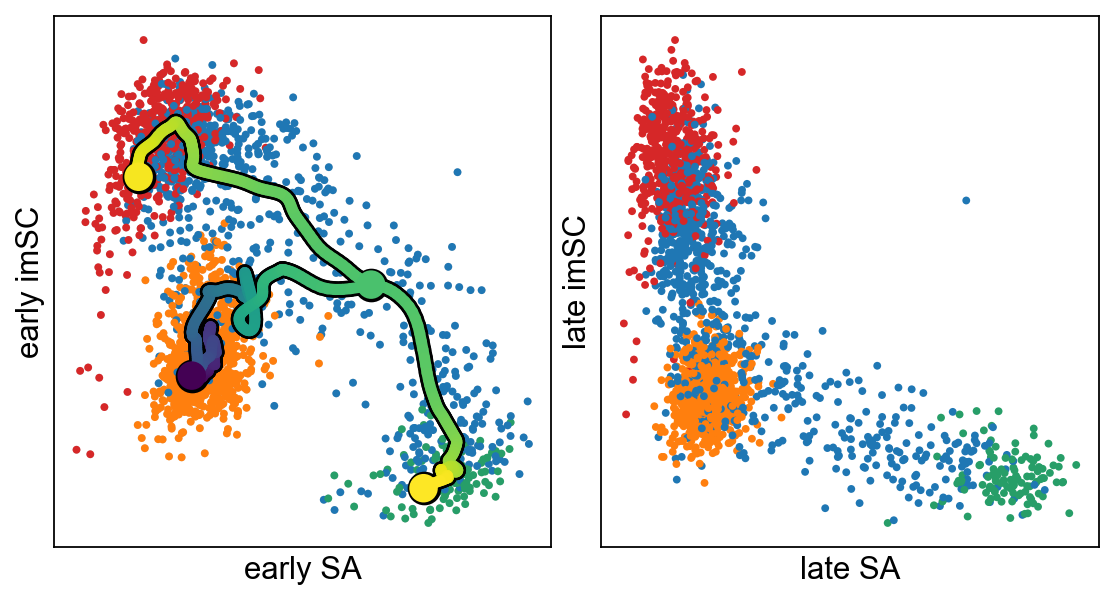

In [68]:
sc.set_figure_params()
scf.pl.modules(adata,r,m,show_traj=True)

In [70]:
scf.get.fork_stats(adata,r,m).loc["Nfasc"]

SA                  0.0
imSC          -2.370144
de_p                0.0
fdr                 0.0
signi_p             1.0
signi_fdr           1.0
up_A          34.522418
up_p                0.0
branch               SA
activation     0.047957
module             late
Name: Nfasc, dtype: object

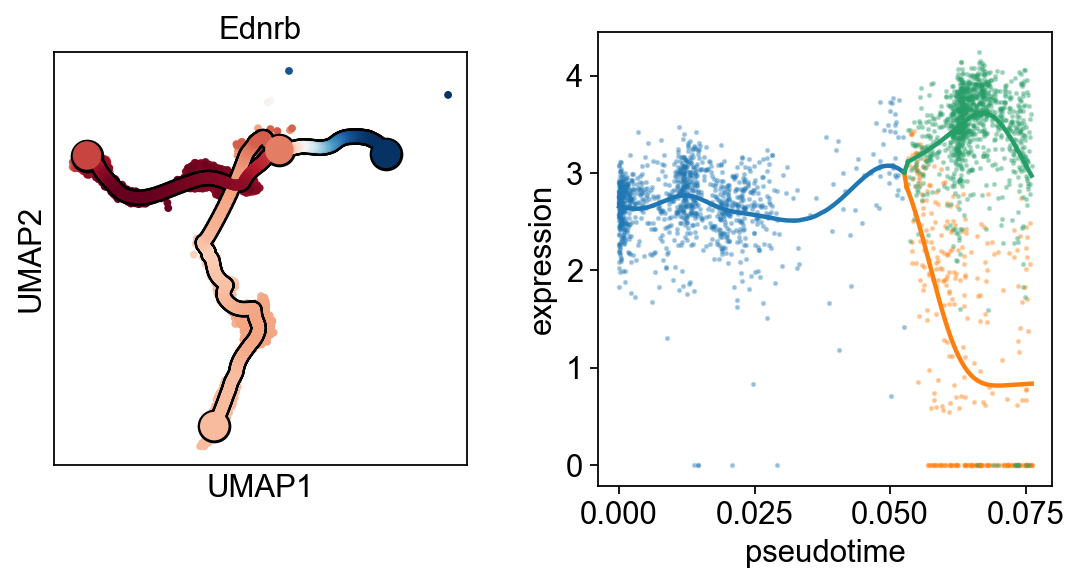

In [72]:
scf.pl.single_trend(adata,"Ednrb")

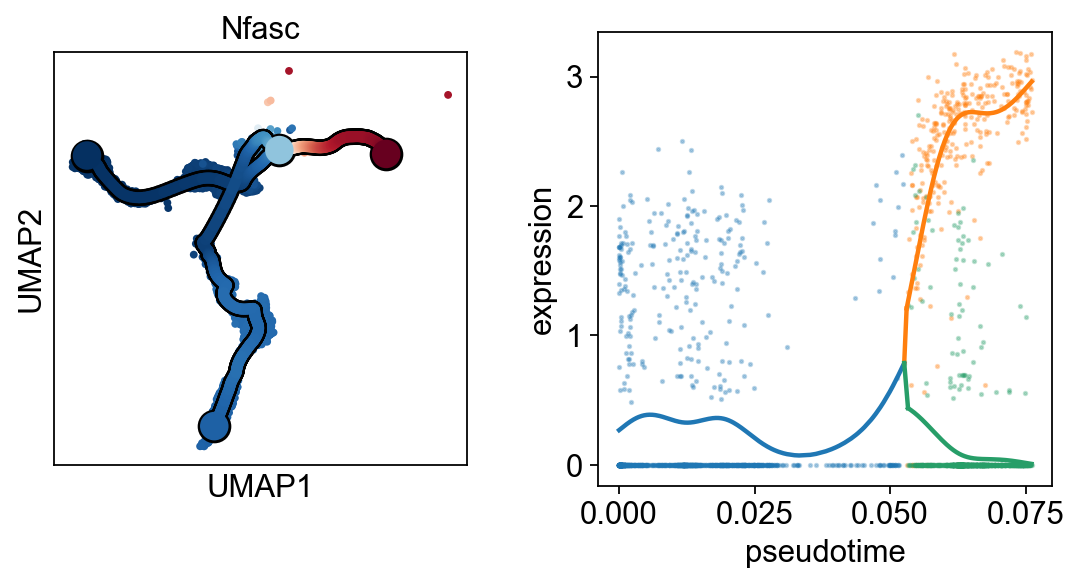

In [71]:
scf.pl.single_trend(adata,"Nfasc")

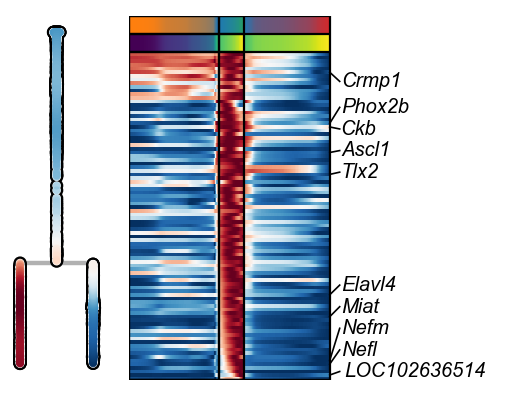

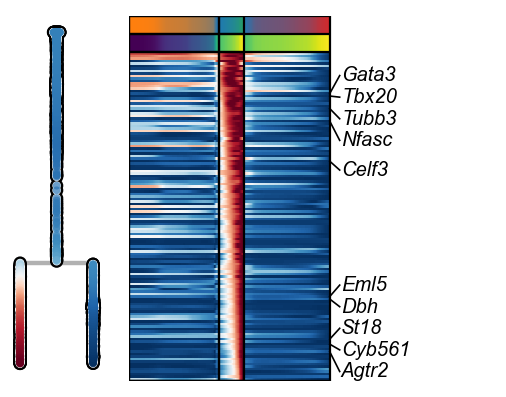

In [73]:
sc.set_figure_params(figsize=(1,4))

scf.pl.trends(adata,root_milestone=r,milestones=m,basis="dendro",frameon=False,tree_behind=True,add_outline=True,
              module="early",branch=m[0],ordering="max",clip_on=False,wspace=0.1,style="italic",
              figsize=(3.8,3),heatmap_space=.2,offset_names=.05,linewidth_seg=2,annot="milestones")

scf.pl.trends(adata,root_milestone=r,milestones=m,basis="dendro",frameon=False,tree_behind=True,add_outline=True,
              module="late",branch=m[0],ordering="max",clip_on=False,wspace=0.1,style="italic",
              figsize=(3.8,3),heatmap_space=.2,offset_names=.05,linewidth_seg=2,annot="milestones")

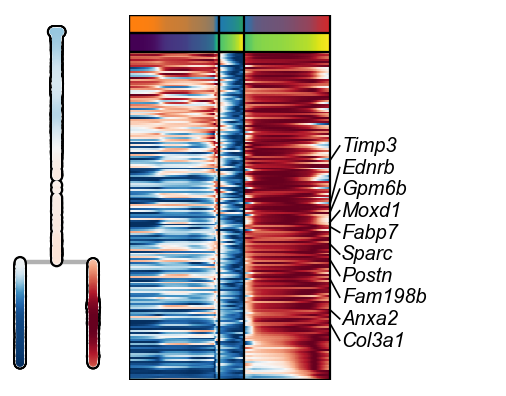

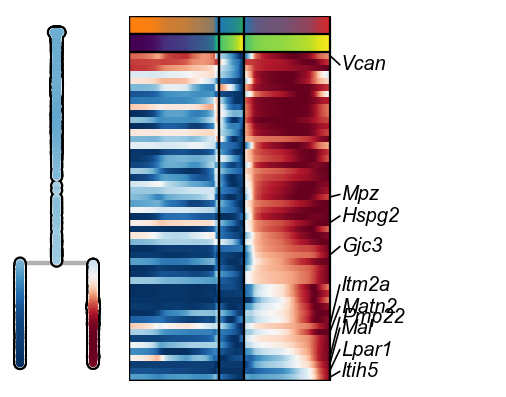

In [74]:
scf.pl.trends(adata,root_milestone=r,milestones=m,basis="dendro",frameon=False,tree_behind=True,add_outline=True,
              module="early",branch=m[1],ordering="max",clip_on=False,wspace=0.1,style="italic",
              figsize=(3.8,3),heatmap_space=.2,offset_names=.05,linewidth_seg=2,annot="milestones",save_genes="test")

scf.pl.trends(adata,root_milestone=r,milestones=m,basis="dendro",frameon=False,tree_behind=True,add_outline=True,
              module="late",branch=m[1],ordering="max",clip_on=False,wspace=0.1,style="italic",
              figsize=(3.8,3),heatmap_space=.2,offset_names=.05,linewidth_seg=2,annot="milestones")

In [75]:
scf.tl.slide_cells(adata,r,m,win=100)

--> added 
    .uns['NCC2->SA<>imSC']['cell_freq'], probability assignment of cells on 27 non intersecting windows.


In [76]:
scf.tl.slide_cors(adata,r,m)

--> added 
    .uns['NCC2->SA<>imSC']['corAB'], gene-gene correlation modules.


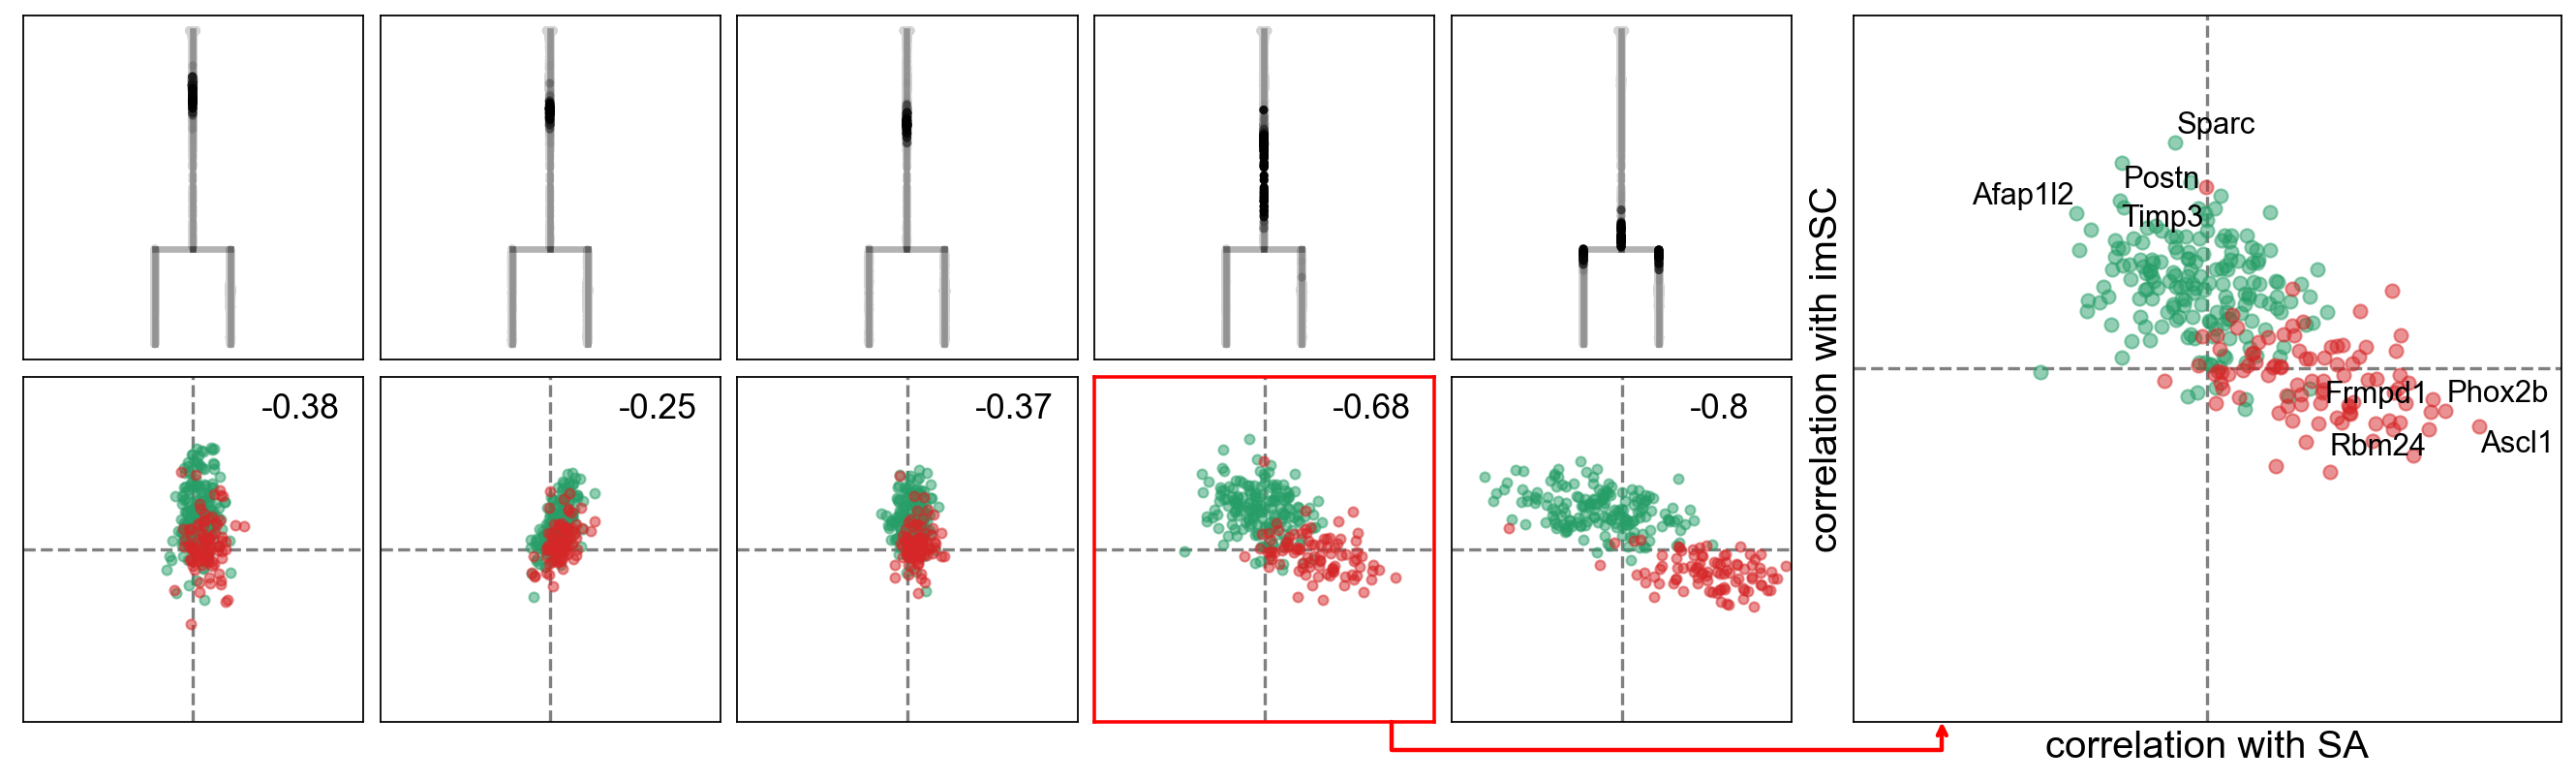

In [77]:
scf.pl.slide_cors(adata,r,m,basis="dendro",win_keep=range(7,12),focus=3)

In [88]:
scf.tl.synchro_path(adata,r,m,winp=10,w=20,step=10)

computing local correlations
    single mapping
    to imSC: 100%|██████████| 210/210 [00:04<00:00, 49.24it/s]
    finished (0:00:18) --> added 
    .uns['NCC2->SA<>imSC']['synchro'], mean local gene-gene correlations of all possible gene pairs inside one module, or between the two modules.
    .obs['inter_cor NCC2->SA<>imSC'], GAM fit of inter-module mean local gene-gene correlations prior to bifurcation.


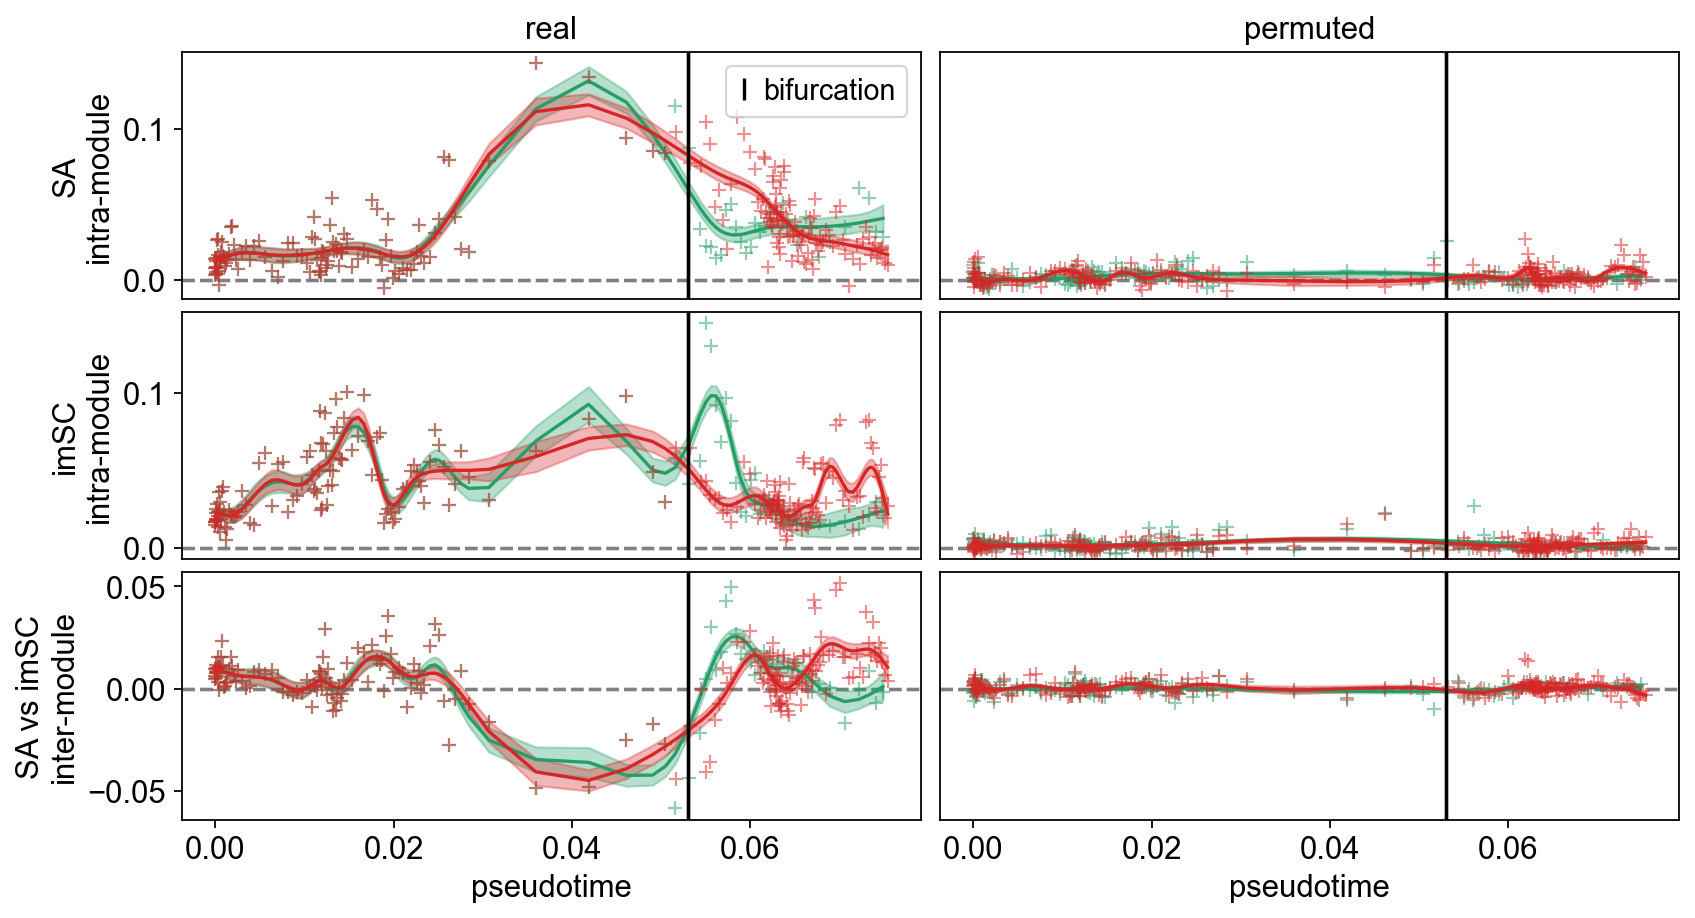

In [89]:
scf.pl.synchro_path(adata,r,m,knots=30)

In [90]:
scf.tl.synchro_path(adata,r,m,winp=10,w=20,step=10,n_jobs=80,n_map=100)

computing local correlations
    multi mapping permutations: 100%|██████████| 100/100 [01:15<00:00,  1.33it/s]
    finished (0:02:16) --> added 
    .uns['NCC2->SA<>imSC']['synchro'], mean local gene-gene correlations of all possible gene pairs inside one module, or between the two modules.
    .obs['inter_cor NCC2->SA<>imSC'], GAM fit of inter-module mean local gene-gene correlations prior to bifurcation.


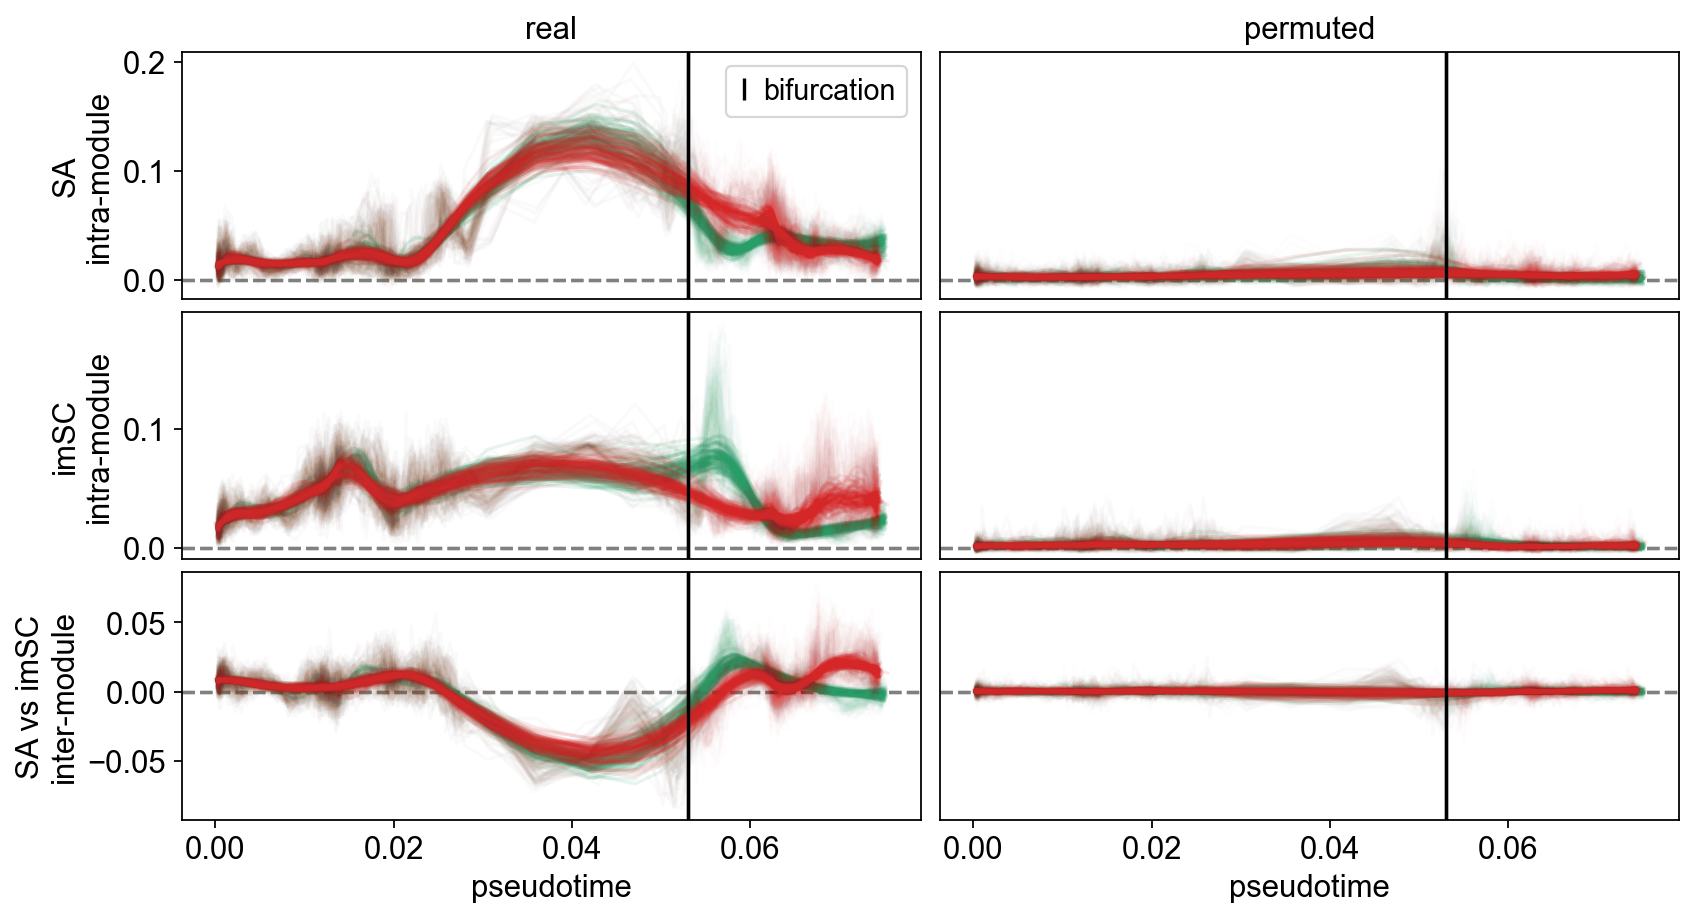

In [95]:
scf.pl.synchro_path(adata,r,m,knots=20)

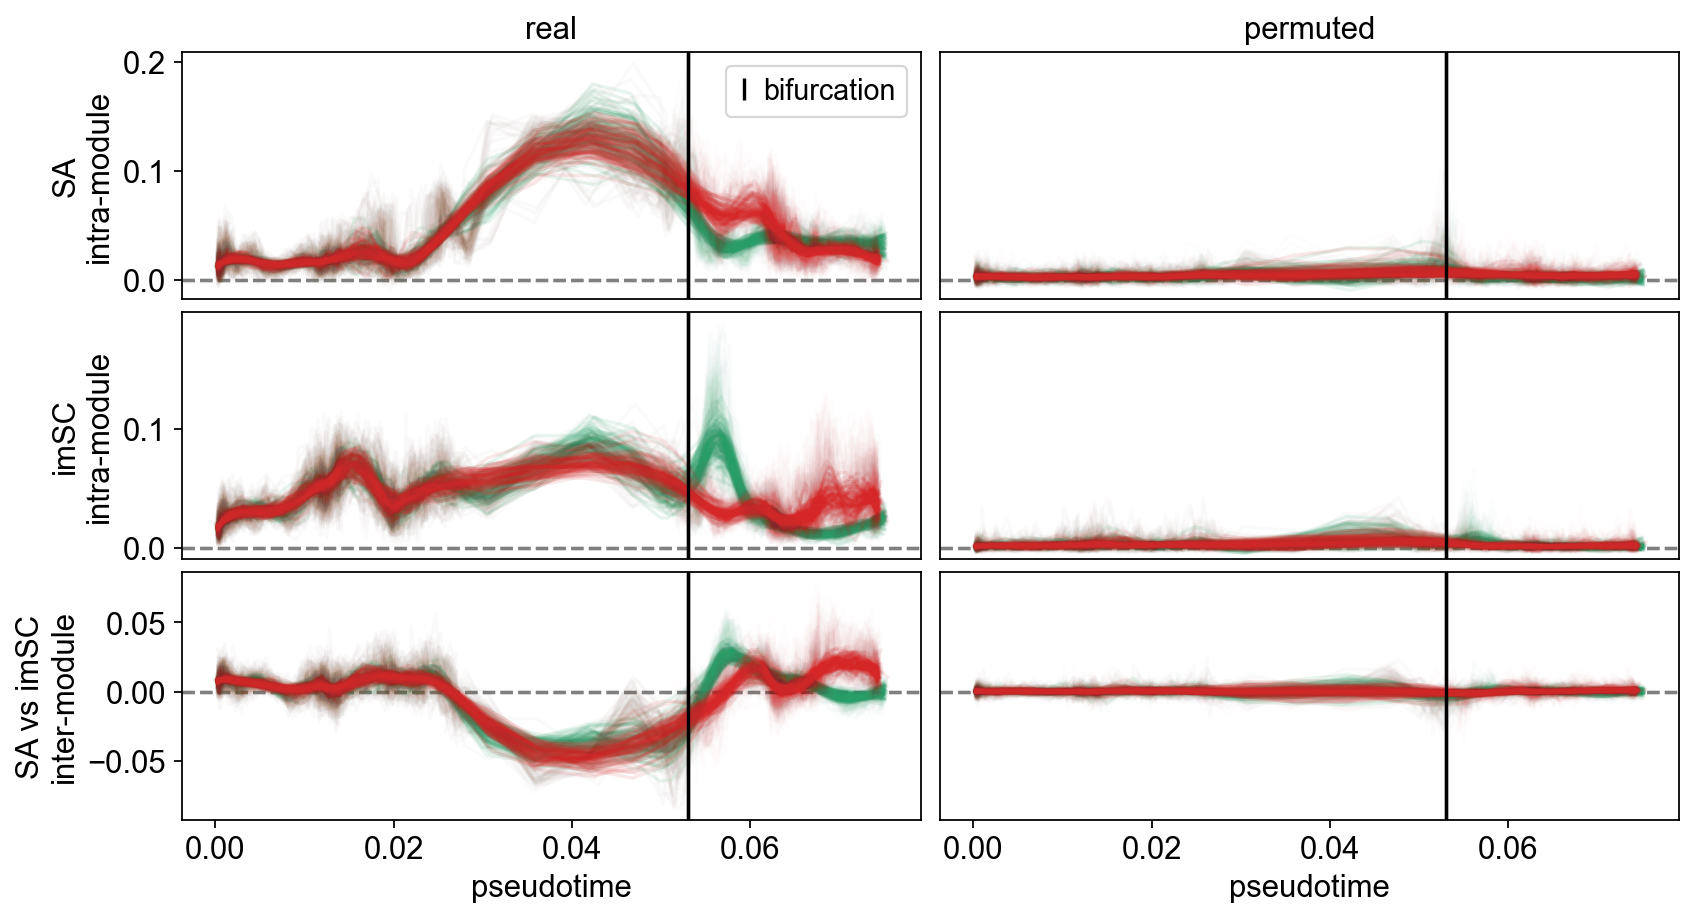

In [92]:
scf.pl.synchro_path(adata,r,m,knots=30,knots_multi=40)

In [93]:
adata.write("data/adata_bif_SASC.h5ad")